<a href="https://colab.research.google.com/github/faisal-fida/100-Python-Projects-in-Google-Colab/blob/main/Object_Classification_using_SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tasks to Perform:**

*   Collect data (CIFAR-10 dataset) consisting of 60,000 32x32 color images in 10 classes.

*   Preprocess the data by normalizing pixel values and applying data augmentation techniques (flipping, rotation, and cropping).

*   Extract features from images using Histogram of Oriented Gradients (HOG) technique based on gradient orientations of pixels in cells.

*   Train SVM model using labeled training dataset to learn to classify objects based on extracted features.

*   Evaluate performance of SVM model on test dataset using accuracy, precision, recall, and F1-score as performance metrics.

*   Assess generalization performance of SVM model on new, unseen data using evaluation results.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from skimage.feature import hog
from tensorflow.keras import datasets
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Data Collection:

170498071/170498071 [==============================] - 3s 0us/step


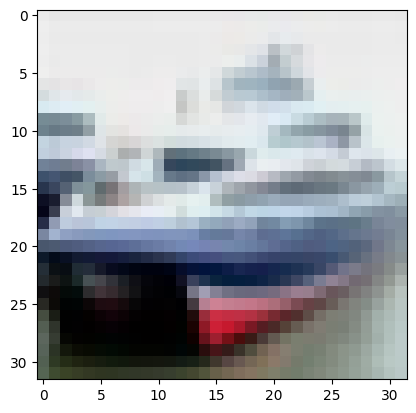

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

plt.imshow(x_test[1])
plt.show()

## Data Preprocessing:



In [ ]:
# Convert the images to grayscale
x_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

# Normalize the pixel values to be between 0 and 1
x_train_norm = (x_train_gray.astype('float32') / 255).reshape(-1, 32, 32, 1)
x_test_norm = (x_test_gray.astype('float32') / 255).reshape(-1, 32, 32, 1)

# Perform data augmentation techniques such as flipping, rotation, and cropping
data_generator = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1,
        fill_mode='nearest')

data_generator.fit(x_train_norm)
x_train_aug = data_generator.flow(x_train_norm, y_train, batch_size=32)

In [ ]:
normalize_pixel_values(convert_to_gray(x_test)).shape

(10000, 32, 32, 1)

## Feature Extraction:

In [ ]:
# Define the HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Compute the HOG features for the training and testing data
x_train_hog = np.array([hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, transform_sqrt=True, feature_vector=True) for image in x_train_norm])
x_test_hog = np.array([hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, transform_sqrt=True, feature_vector=True) for image in x_test_norm])

ValueError: ignored

## Model Training:

In [ ]:
svm_model = SVC(kernel='poly', degree=3, C=1)

# Train model and record the accuracy during each epoch
epochs = 50
train_acc = []
test_acc = []

for epoch in range(epochs):
    # Train the model on a single epoch of the training data
    svm_model.fit(x_train_hog, y_train.ravel())

    # Evaluate the accuracy of the model on the training and testing data
    train_pred = svm_model.predict(x_train_hog)
    test_pred = svm_model.predict(x_test_hog)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Record the accuracy for this epoch
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    print(f'Epoch {epoch+1}/{epochs} - Train Accuracy: {train_accuracy:.4f} - Test Accuracy: {test_accuracy:.4f}')

# Plot the accuracy of the model during training and testing
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.title('Accuracy of SVM Model during Training and Testing')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

SVC(C=1, kernel='poly')

## Model Evaluation:

In [ ]:
# Evaluate the performance of the SVM model on the testing data
y_pred = svm_model.predict(x_test_hog)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.6121
Precision: 0.6133424095964775
Recall: 0.6121000000000001
F1-score: 0.6118415023708575
